# Mixture model example.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [6]:
# Polynomial model
def line(theta, x):
    return np.polyval(theta, x)

def lnlike(pars, x, y, yerr):
    Y, V, P, slope, intercept = pars
    theta = [slope, intercept]
    
    model1 = line(theta, x)
    model2 = Y
    ivar1 = 1./(yerr**2)
    ivar2 = 1./(V + yerr**2)
    lnlike1 =  - 0.5 * ((y-model1)**2*ivar1)
    lnlike2 =  - 0.5 * ((y-model2)**2*ivar2 - np.log(np.sqrt(ivar2)))
    ll = np.sum(np.logaddexp(np.log(1-P) + lnlike1, np.log(P) + lnlike2))

    # Uniform priors over P and variances
    if P > 0 and P < 1 and V > 0:
        return ll
    else:
        return -np.inf

Simulate some data.

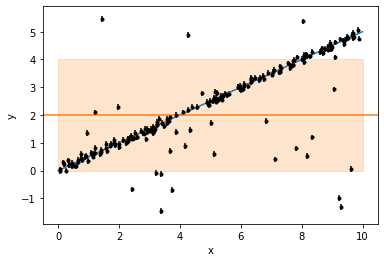

In [7]:
np.random.seed(42)

# Parameters
V = 2**2  # The variance of the outlier population
Y = 2  # The mean of the outlier Gaussian distribution
P = .15  # The probability that a star is an outlier (15% of stars will be outliers).
slope = .5  # Line parameter
intercept = 0.  # Line parameter

nstars = 200
x = np.random.uniform(0, 10, nstars)
y_uncert = .1
y = intercept + slope * x + np.random.randn(nstars)*y_uncert
yerr = np.ones_like(y)*y_uncert

# Add outliers.
nout = int(nstars * P)
outliers = np.random.choice(np.arange(nstars), size=nout)
y[outliers] = np.random.randn(nout)*np.sqrt(V) + Y

xs = np.linspace(0, 10, 100)
plt.plot(xs, intercept + slope*xs)
plt.axhline(Y, color="C1")
plt.fill_between(xs, Y - np.sqrt(V), Y + np.sqrt(V), alpha=.2, color="C1")
plt.errorbar(x, y, yerr=yerr, fmt="k.");
plt.xlabel("x")
plt.ylabel("y");

Test the likelihood function.

In [8]:
p_true = [Y, V, P, slope, intercept]
print(lnlike(p_true, x, y, yerr))

-150.38688879464635


Optimize the model.

In [9]:
p_init = p_true + np.random.randn(len(p_true))*.1

# Calculate maximum-likelihood values
nll = lambda *args: -lnlike(*args)
print(lnlike(p_init, x, y, yerr))
result = sco.minimize(nll, p_init, args=(x, y, yerr))
print(result.x)

-450.8723236497227
[ 2.07600245e+00  5.03943111e+00  6.31049597e-01  5.01141131e-01
 -2.08063826e-03]


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


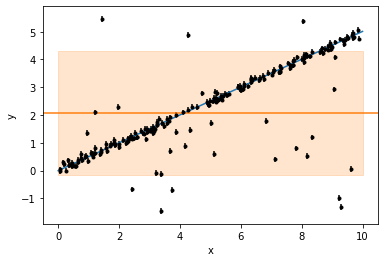

In [11]:
xs = np.linspace(0, 10, 100)
plt.plot(xs, result.x[4] + result.x[3]*xs)
plt.axhline(result.x[0], color="C1")
plt.fill_between(xs, result.x[0] - np.sqrt(result.x[1]), result.x[0] + np.sqrt(result.x[1]), alpha=.2, color="C1")
plt.errorbar(x, y, yerr=yerr, fmt="k.");
plt.xlabel("x")
plt.ylabel("y");